# 🏎️ F1 Miami GP Prediction Interactive Dashboard

This interactive dashboard provides comprehensive analysis of the F1 Miami Grand Prix prediction models and results.

## 📊 Features:
- Interactive visualizations
- Model performance comparisons
- Driver-specific analysis
- Prediction accuracy metrics
- Error analysis and insights

## 🔧 Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load datasets
try:
    predictions = pd.read_csv('miami_gp_predictions_comparison.csv')
    eval_metrics = pd.read_csv('model_evaluation_summary.csv')
    print("✅ Data loaded successfully!")
    print(f"📊 Loaded {len(predictions)} driver predictions")
    print(f"📊 Loaded {len(eval_metrics)} model evaluations")
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("Please ensure the CSV files are in the current directory")

✅ Data loaded successfully!
📊 Loaded 20 driver predictions
📊 Loaded 3 model evaluations


In [3]:
# Data overview
print("📋 Dataset Overview:")
print("\nPredictions Dataset:")
print(predictions.head())

print("\nModel Evaluation Metrics:")
print(eval_metrics)

📋 Dataset Overview:

Predictions Dataset:
       driver_name      team  grid_position  actual_position  pred_linear_reg  \
0     Lando Norris   McLaren            5.0              1.0        17.190111   
1   Max Verstappen  Red Bull            1.0              2.0         0.808575   
2  Charles Leclerc   Ferrari            2.0              3.0         4.072043   
3     Sergio Perez  Red Bull            4.0              4.0         2.870591   
4     Carlos Sainz   Ferrari            3.0              5.0         3.697330   

   pred_weighted_avg  pred_random_forest  
0               13.3               17.36  
1                1.9                1.18  
2                4.3                3.06  
3                4.0                3.61  
4                4.3                4.18  

Model Evaluation Metrics:
               model       mae      rmse        r2  exact_accuracy  \
0  Linear Regression  3.488359  4.974030  0.255911            10.0   
1   Weighted Average  2.610000  3.929122  0.53

## 🎯 Interactive Model Performance Comparison

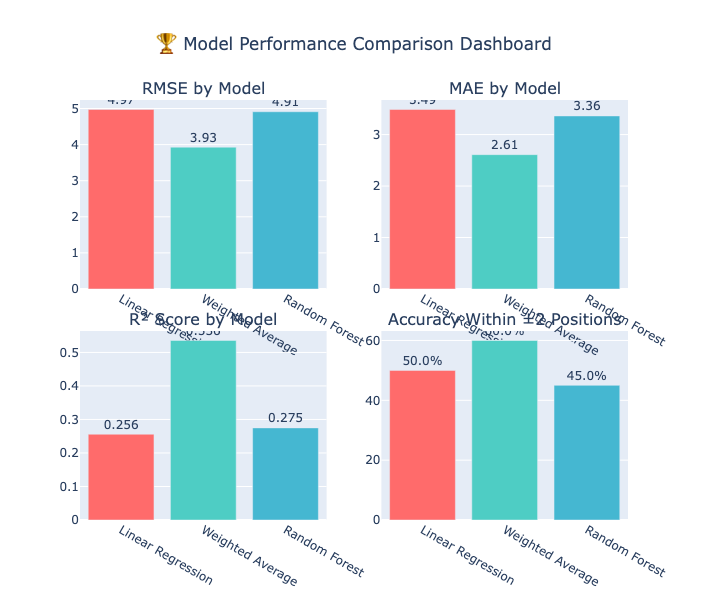

In [4]:
# Interactive model performance comparison
def create_performance_dashboard():
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('RMSE by Model', 'MAE by Model', 'R² Score by Model', 'Accuracy Within ±2 Positions'),
        vertical_spacing=0.1
    )
    
    models = eval_metrics['model']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    # RMSE
    fig.add_trace(
        go.Bar(x=models, y=eval_metrics['rmse'], name='RMSE', 
               marker_color=colors, text=eval_metrics['rmse'].round(2),
               textposition='outside'),
        row=1, col=1
    )
    
    # MAE
    fig.add_trace(
        go.Bar(x=models, y=eval_metrics['mae'], name='MAE',
               marker_color=colors, text=eval_metrics['mae'].round(2),
               textposition='outside'),
        row=1, col=2
    )
    
    # R²
    fig.add_trace(
        go.Bar(x=models, y=eval_metrics['r2'], name='R²',
               marker_color=colors, text=eval_metrics['r2'].round(3),
               textposition='outside'),
        row=2, col=1
    )
    
    # Accuracy within ±2
    fig.add_trace(
        go.Bar(x=models, y=eval_metrics['within_2_accuracy'], name='±2 Accuracy',
               marker_color=colors, text=[f"{x:.1f}%" for x in eval_metrics['within_2_accuracy']],
               textposition='outside'),
        row=2, col=2
    )
    
    fig.update_layout(
        height=600,
        title_text="🏆 Model Performance Comparison Dashboard",
        title_x=0.5,
        showlegend=False
    )
    
    fig.show()

create_performance_dashboard()

## 🎯 Predicted vs Actual Positions Analysis

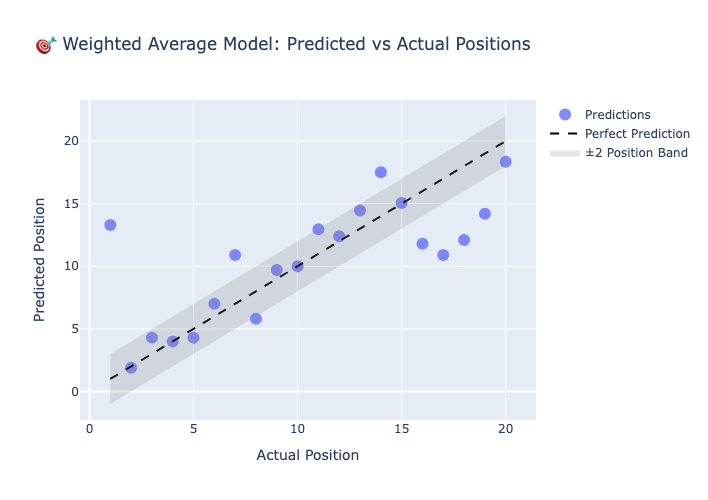

In [5]:
# Interactive scatter plot for predicted vs actual positions
def create_prediction_scatter(model_col, model_name):
    fig = go.Figure()
    
    # Add scatter plot
    fig.add_trace(
        go.Scatter(
            x=predictions['actual_position'],
            y=predictions[model_col],
            mode='markers',
            marker=dict(size=12, opacity=0.8),
            text=predictions['driver_name'],
            hovertemplate=
                '<b>%{text}</b><br>' +
                'Actual Position: %{x}<br>' +
                'Predicted Position: %{y:.1f}<br>' +
                'Error: %{customdata:.1f}' +
                '<extra></extra>',
            customdata=abs(predictions['actual_position'] - predictions[model_col]),
            name='Predictions'
        )
    )
    
    # Add perfect prediction line
    fig.add_trace(
        go.Scatter(
            x=[1, 20],
            y=[1, 20],
            mode='lines',
            line=dict(dash='dash', color='black'),
            name='Perfect Prediction'
        )
    )
    
    # Add error bands
    x_range = np.linspace(1, 20, 100)
    fig.add_trace(
        go.Scatter(
            x=np.concatenate([x_range, x_range[::-1]]),
            y=np.concatenate([x_range-2, (x_range+2)[::-1]]),
            fill='toself',
            fillcolor='rgba(128,128,128,0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            name='±2 Position Band'
        )
    )
    
    fig.update_layout(
        title=f"🎯 {model_name}: Predicted vs Actual Positions",
        xaxis_title="Actual Position",
        yaxis_title="Predicted Position",
        height=500,
        hovermode='closest'
    )
    
    return fig

# Show for best model (Weighted Average)
fig = create_prediction_scatter('pred_weighted_avg', 'Weighted Average Model')
fig.show()

## 🏁 2024 Miami GP Results Table

In [6]:
# Create an interactive results table
results_table = predictions.copy()
results_table['WA_Error'] = abs(results_table['actual_position'] - results_table['pred_weighted_avg'])
results_table['LR_Error'] = abs(results_table['actual_position'] - results_table['pred_linear_reg'])
results_table['RF_Error'] = abs(results_table['actual_position'] - results_table['pred_random_forest'])

# Sort by actual position
results_table = results_table.sort_values('actual_position')

# Create the table
display_columns = [
    'actual_position', 'driver_name', 'team', 'grid_position',
    'pred_weighted_avg', 'pred_linear_reg', 'pred_random_forest',
    'WA_Error', 'LR_Error', 'RF_Error'
]

results_display = results_table[display_columns].round(1)
results_display.columns = [
    'Pos', 'Driver', 'Team', 'Grid', 
    'WA Pred', 'LR Pred', 'RF Pred',
    'WA Error', 'LR Error', 'RF Error'
]

# Style the dataframe
def highlight_podium(row):
    if row['Pos'] <= 3:
        return ['background-color: #FFD700'] * len(row)  # Gold for podium
    elif row['Pos'] <= 10:
        return ['background-color: #E6F3FF'] * len(row)  # Light blue for points
    else:
        return ['background-color: white'] * len(row)

styled_results = results_display.style.apply(highlight_podium, axis=1)
print("🏁 2024 Miami Grand Prix - Complete Results & Predictions")
print("🥇 Gold: Podium (P1-3) | 🔵 Blue: Points (P4-10) | ⚪ White: No Points")
styled_results

🏁 2024 Miami Grand Prix - Complete Results & Predictions
🥇 Gold: Podium (P1-3) | 🔵 Blue: Points (P4-10) | ⚪ White: No Points


,Pos,Driver,Team,Grid,WA Pred,LR Pred,RF Pred,WA Error,LR Error,RF Error
0,1.000000,Lando Norris,McLaren,5.000000,13.300000,17.200000,17.400000,12.300000,16.200000,16.400000
1,2.000000,Max Verstappen,Red Bull,1.000000,1.900000,0.800000,1.200000,0.100000,1.200000,0.800000
2,3.000000,Charles Leclerc,Ferrari,2.000000,4.300000,4.100000,3.100000,1.300000,1.100000,0.100000
3,4.000000,Sergio Perez,Red Bull,4.000000,4.000000,2.900000,3.600000,0.000000,1.100000,0.400000
4,5.000000,Carlos Sainz,Ferrari,3.000000,4.300000,3.700000,4.200000,0.700000,1.300000,0.800000
5,6.000000,Lewis Hamilton,Mercedes,8.000000,7.000000,6.100000,6.900000,1.000000,0.100000,0.900000
6,7.000000,Yuki Tsunoda,RB,10.000000,10.900000,11.400000,12.400000,3.900000,4.400000,5.400000
7,8.000000,George Russell,Mercedes,7.000000,5.800000,4.600000,5.500000,2.200000,3.400000,2.500000
8,9.000000,Fernando Alonso,Aston Martin,15.000000,9.700000,7.700000,8.500000,0.700000,1.300000,0.500000
9,10.000000,Esteban Ocon,Alpine,13.000000,10.000000,8.900000,9.200000,0.000000,1.100000,0.800000


## 📊 Error Analysis Dashboard

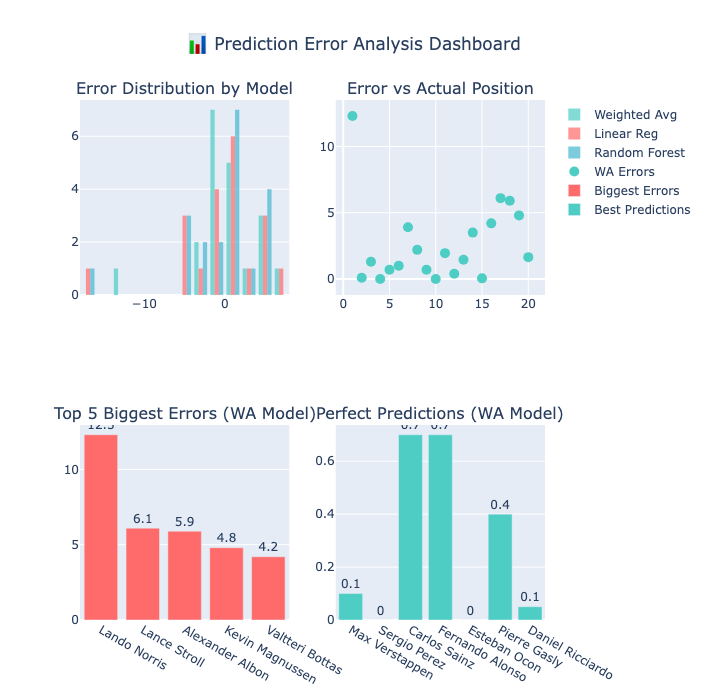

In [7]:
# Error analysis
def create_error_analysis():
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Error Distribution by Model',
            'Error vs Actual Position', 
            'Top 5 Biggest Errors (WA Model)',
            'Perfect Predictions (WA Model)'
        )
    )
    
    # Error distribution
    models = ['pred_weighted_avg', 'pred_linear_reg', 'pred_random_forest']
    model_names = ['Weighted Avg', 'Linear Reg', 'Random Forest']
    colors = ['#4ECDC4', '#FF6B6B', '#45B7D1']
    
    for i, (model, name, color) in enumerate(zip(models, model_names, colors)):
        errors = predictions['actual_position'] - predictions[model]
        fig.add_trace(
            go.Histogram(x=errors, name=name, opacity=0.7, marker_color=color),
            row=1, col=1
        )
    
    # Error vs position (Weighted Average)
    wa_errors = abs(predictions['actual_position'] - predictions['pred_weighted_avg'])
    fig.add_trace(
        go.Scatter(
            x=predictions['actual_position'],
            y=wa_errors,
            mode='markers',
            marker=dict(size=10, color='#4ECDC4'),
            text=predictions['driver_name'],
            name='WA Errors'
        ),
        row=1, col=2
    )
    
    # Top 5 biggest errors
    biggest_errors = predictions.nlargest(5, 'WA_Error')
    fig.add_trace(
        go.Bar(
            x=biggest_errors['driver_name'],
            y=biggest_errors['WA_Error'],
            marker_color='#FF6B6B',
            text=biggest_errors['WA_Error'].round(1),
            textposition='outside',
            name='Biggest Errors'
        ),
        row=2, col=1
    )
    
    # Perfect/near-perfect predictions
    good_predictions = predictions[predictions['WA_Error'] <= 1]
    fig.add_trace(
        go.Bar(
            x=good_predictions['driver_name'],
            y=good_predictions['WA_Error'],
            marker_color='#4ECDC4',
            text=good_predictions['WA_Error'].round(1),
            textposition='outside',
            name='Best Predictions'
        ),
        row=2, col=2
    )
    
    fig.update_layout(
        height=700,
        title_text="📊 Prediction Error Analysis Dashboard",
        title_x=0.5,
        showlegend=True
    )
    
    return fig

# Add error columns
predictions['WA_Error'] = abs(predictions['actual_position'] - predictions['pred_weighted_avg'])
predictions['LR_Error'] = abs(predictions['actual_position'] - predictions['pred_linear_reg'])
predictions['RF_Error'] = abs(predictions['actual_position'] - predictions['pred_random_forest'])

error_fig = create_error_analysis()
error_fig.show()

## 🎖️ Key Insights Summary

In [8]:
# Generate key insights
best_model = eval_metrics.loc[eval_metrics['rmse'].idxmin(), 'model']
best_rmse = eval_metrics['rmse'].min()
best_accuracy = eval_metrics.loc[eval_metrics['rmse'].idxmin(), 'within_2_accuracy']

# Winner analysis
actual_winner = predictions[predictions['actual_position'] == 1]['driver_name'].iloc[0]
predicted_winners = {
    'Weighted Average': predictions.loc[predictions['pred_weighted_avg'].idxmin(), 'driver_name'],
    'Linear Regression': predictions.loc[predictions['pred_linear_reg'].idxmin(), 'driver_name'],
    'Random Forest': predictions.loc[predictions['pred_random_forest'].idxmin(), 'driver_name']
}

# Perfect predictions
perfect_predictions = predictions[predictions['WA_Error'] == 0]

print("🏆 KEY INSIGHTS SUMMARY")
print("="*50)
print(f"🥇 Best Model: {best_model}")
print(f"📊 Best RMSE: {best_rmse:.3f} positions")
print(f"🎯 Accuracy (±2 pos): {best_accuracy:.1f}%")
print()
print(f"🏁 Actual Race Winner: {actual_winner}")
print("🔮 Predicted Winners:")
for model, winner in predicted_winners.items():
    correct = "✅" if winner == actual_winner else "❌"
    print(f"   {model}: {winner} {correct}")
print()
print(f"🎯 Perfect Predictions ({best_model}):")
if len(perfect_predictions) > 0:
    for _, row in perfect_predictions.iterrows():
        print(f"   {row['driver_name']}: P{int(row['actual_position'])}")
else:
    print("   No perfect predictions")
print()
print("📈 Average Prediction Error: {:.1f} positions".format(predictions['WA_Error'].mean()))
print("📊 Podium Accuracy: {:.1f}%".format(
    len(set(predictions[predictions['actual_position'] <= 3]['driver_name']) & 
        set(predictions.nsmallest(3, 'pred_weighted_avg')['driver_name'])) / 3 * 100
))

🏆 KEY INSIGHTS SUMMARY
🥇 Best Model: Weighted Average
📊 Best RMSE: 3.929 positions
🎯 Accuracy (±2 pos): 60.0%

🏁 Actual Race Winner: Lando Norris
🔮 Predicted Winners:
   Weighted Average: Max Verstappen ❌
   Linear Regression: Max Verstappen ❌
   Random Forest: Max Verstappen ❌

🎯 Perfect Predictions (Weighted Average):
   Sergio Perez: P4
   Esteban Ocon: P10

📈 Average Prediction Error: 2.6 positions
📊 Podium Accuracy: 66.7%


## 🔍 Custom Analysis Functions

In [9]:
# Interactive function to analyze specific drivers
def analyze_driver(driver_name):
    driver_data = predictions[predictions['driver_name'] == driver_name]
    if len(driver_data) == 0:
        print(f"❌ Driver '{driver_name}' not found")
        return
    
    row = driver_data.iloc[0]
    print(f"🏎️ DRIVER ANALYSIS: {driver_name}")
    print("="*40)
    print(f"Team: {row['team']}")
    print(f"Grid Position: P{int(row['grid_position'])}")
    print(f"Actual Finish: P{int(row['actual_position'])}")
    print()
    print("🔮 Model Predictions:")
    print(f"   Weighted Average: P{row['pred_weighted_avg']:.1f} (Error: {row['WA_Error']:.1f})")
    print(f"   Linear Regression: P{row['pred_linear_reg']:.1f} (Error: {row['LR_Error']:.1f})")
    print(f"   Random Forest: P{row['pred_random_forest']:.1f} (Error: {row['RF_Error']:.1f})")
    print()
    print(f"📊 Position Change: {int(row['grid_position']) - int(row['actual_position'])} positions")

# Example usage - analyze specific drivers
print("🔍 DRIVER ANALYSIS EXAMPLES\n")
analyze_driver("Lando Norris")  # Race winner
print("\n" + "-"*50 + "\n")
analyze_driver("Max Verstappen")  # Championship leader

🔍 DRIVER ANALYSIS EXAMPLES

🏎️ DRIVER ANALYSIS: Lando Norris
Team: McLaren
Grid Position: P5
Actual Finish: P1

🔮 Model Predictions:
   Weighted Average: P13.3 (Error: 12.3)
   Linear Regression: P17.2 (Error: 16.2)
   Random Forest: P17.4 (Error: 16.4)

📊 Position Change: 4 positions

--------------------------------------------------

🏎️ DRIVER ANALYSIS: Max Verstappen
Team: Red Bull
Grid Position: P1
Actual Finish: P2

🔮 Model Predictions:
   Weighted Average: P1.9 (Error: 0.1)
   Linear Regression: P0.8 (Error: 1.2)
   Random Forest: P1.2 (Error: 0.8)

📊 Position Change: -1 positions


## 📋 Available Drivers for Analysis

Use the `analyze_driver()` function above with any of these driver names:

In [10]:
# List all available drivers
drivers_list = predictions[['driver_name', 'team', 'actual_position']].sort_values('actual_position')
print("🏎️ 2024 MIAMI GP DRIVERS:")
print("="*40)
for _, row in drivers_list.iterrows():
    print(f"P{int(row['actual_position']):2d} - {row['driver_name']} ({row['team']})")

print("\n💡 Usage: analyze_driver('Driver Name')")
print("Example: analyze_driver('Charles Leclerc')")

🏎️ 2024 MIAMI GP DRIVERS:
P 1 - Lando Norris (McLaren)
P 2 - Max Verstappen (Red Bull)
P 3 - Charles Leclerc (Ferrari)
P 4 - Sergio Perez (Red Bull)
P 5 - Carlos Sainz (Ferrari)
P 6 - Lewis Hamilton (Mercedes)
P 7 - Yuki Tsunoda (RB)
P 8 - George Russell (Mercedes)
P 9 - Fernando Alonso (Aston Martin)
P10 - Esteban Ocon (Alpine)
P11 - Nico Hulkenberg (Haas)
P12 - Pierre Gasly (Alpine)
P13 - Oscar Piastri (McLaren)
P14 - Guanyu Zhou (Sauber)
P15 - Daniel Ricciardo (RB)
P16 - Valtteri Bottas (Sauber)
P17 - Lance Stroll (Aston Martin)
P18 - Alexander Albon (Williams)
P19 - Kevin Magnussen (Haas)
P20 - Logan Sargeant (Williams)

💡 Usage: analyze_driver('Driver Name')
Example: analyze_driver('Charles Leclerc')
